In [53]:
# 加载数据
import pandas as pd
df = pd.read_csv('./data/features_2010_2022.csv')
df = df.set_index('date')
df.index = pd.to_datetime(df.index)


In [54]:
df['ret_1m_after'] = df['ret_1m_after'].shift(-1)

In [55]:
# 统计数据的缺失率
n_dict = {}
for code, code_data in df.groupby('ts_code'):
    missing_ratio = code_data.iloc[:, 1:].isna().sum() / len(code_data)
    n_dict[code] = missing_ratio.to_dict()

In [56]:
missing_info = pd.DataFrame(n_dict)

In [57]:
missing_info

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,000061.SZ,000063.SZ,...,601958.SH,601985.SH,601988.SH,601989.SH,601991.SH,601992.SH,601998.SH,603000.SH,603885.SH,603993.SH
EP,0.908451,1.000000,0.570423,0.401408,0.042254,1.000000,0.147887,1.000000,0.316901,0.147887,...,0.042254,0.992647,1.000000,1.000000,1.000000,0.950704,0.401408,1.000000,1.000000,1.000000
EPcut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.419118,0.000000,0.000000,0.000000,0.084507,0.000000,0.120301,0.338843,0.165414
BP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.419118,0.000000,0.000000,0.000000,0.084507,0.000000,0.120301,0.338843,0.165414
SP,0.908451,1.000000,0.570423,0.401408,0.042254,1.000000,0.147887,1.000000,0.316901,0.147887,...,0.042254,0.992647,1.000000,1.000000,1.000000,0.950704,0.401408,1.000000,1.000000,1.000000
NCFP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.419118,0.000000,0.000000,0.000000,0.084507,0.000000,0.120301,0.338843,0.165414
OCFP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.419118,0.000000,0.000000,0.000000,0.084507,0.000000,0.120301,0.338843,0.165414
G/PE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.419118,0.000000,0.000000,0.000000,0.084507,0.000000,0.157895,0.371901,0.165414
Sales_G_q,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.022059,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.371901,0.112782
Profit_G_q,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.022059,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.371901,0.112782
OCF_G_q,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.021127,0.000000,0.000000,0.099174,0.000000


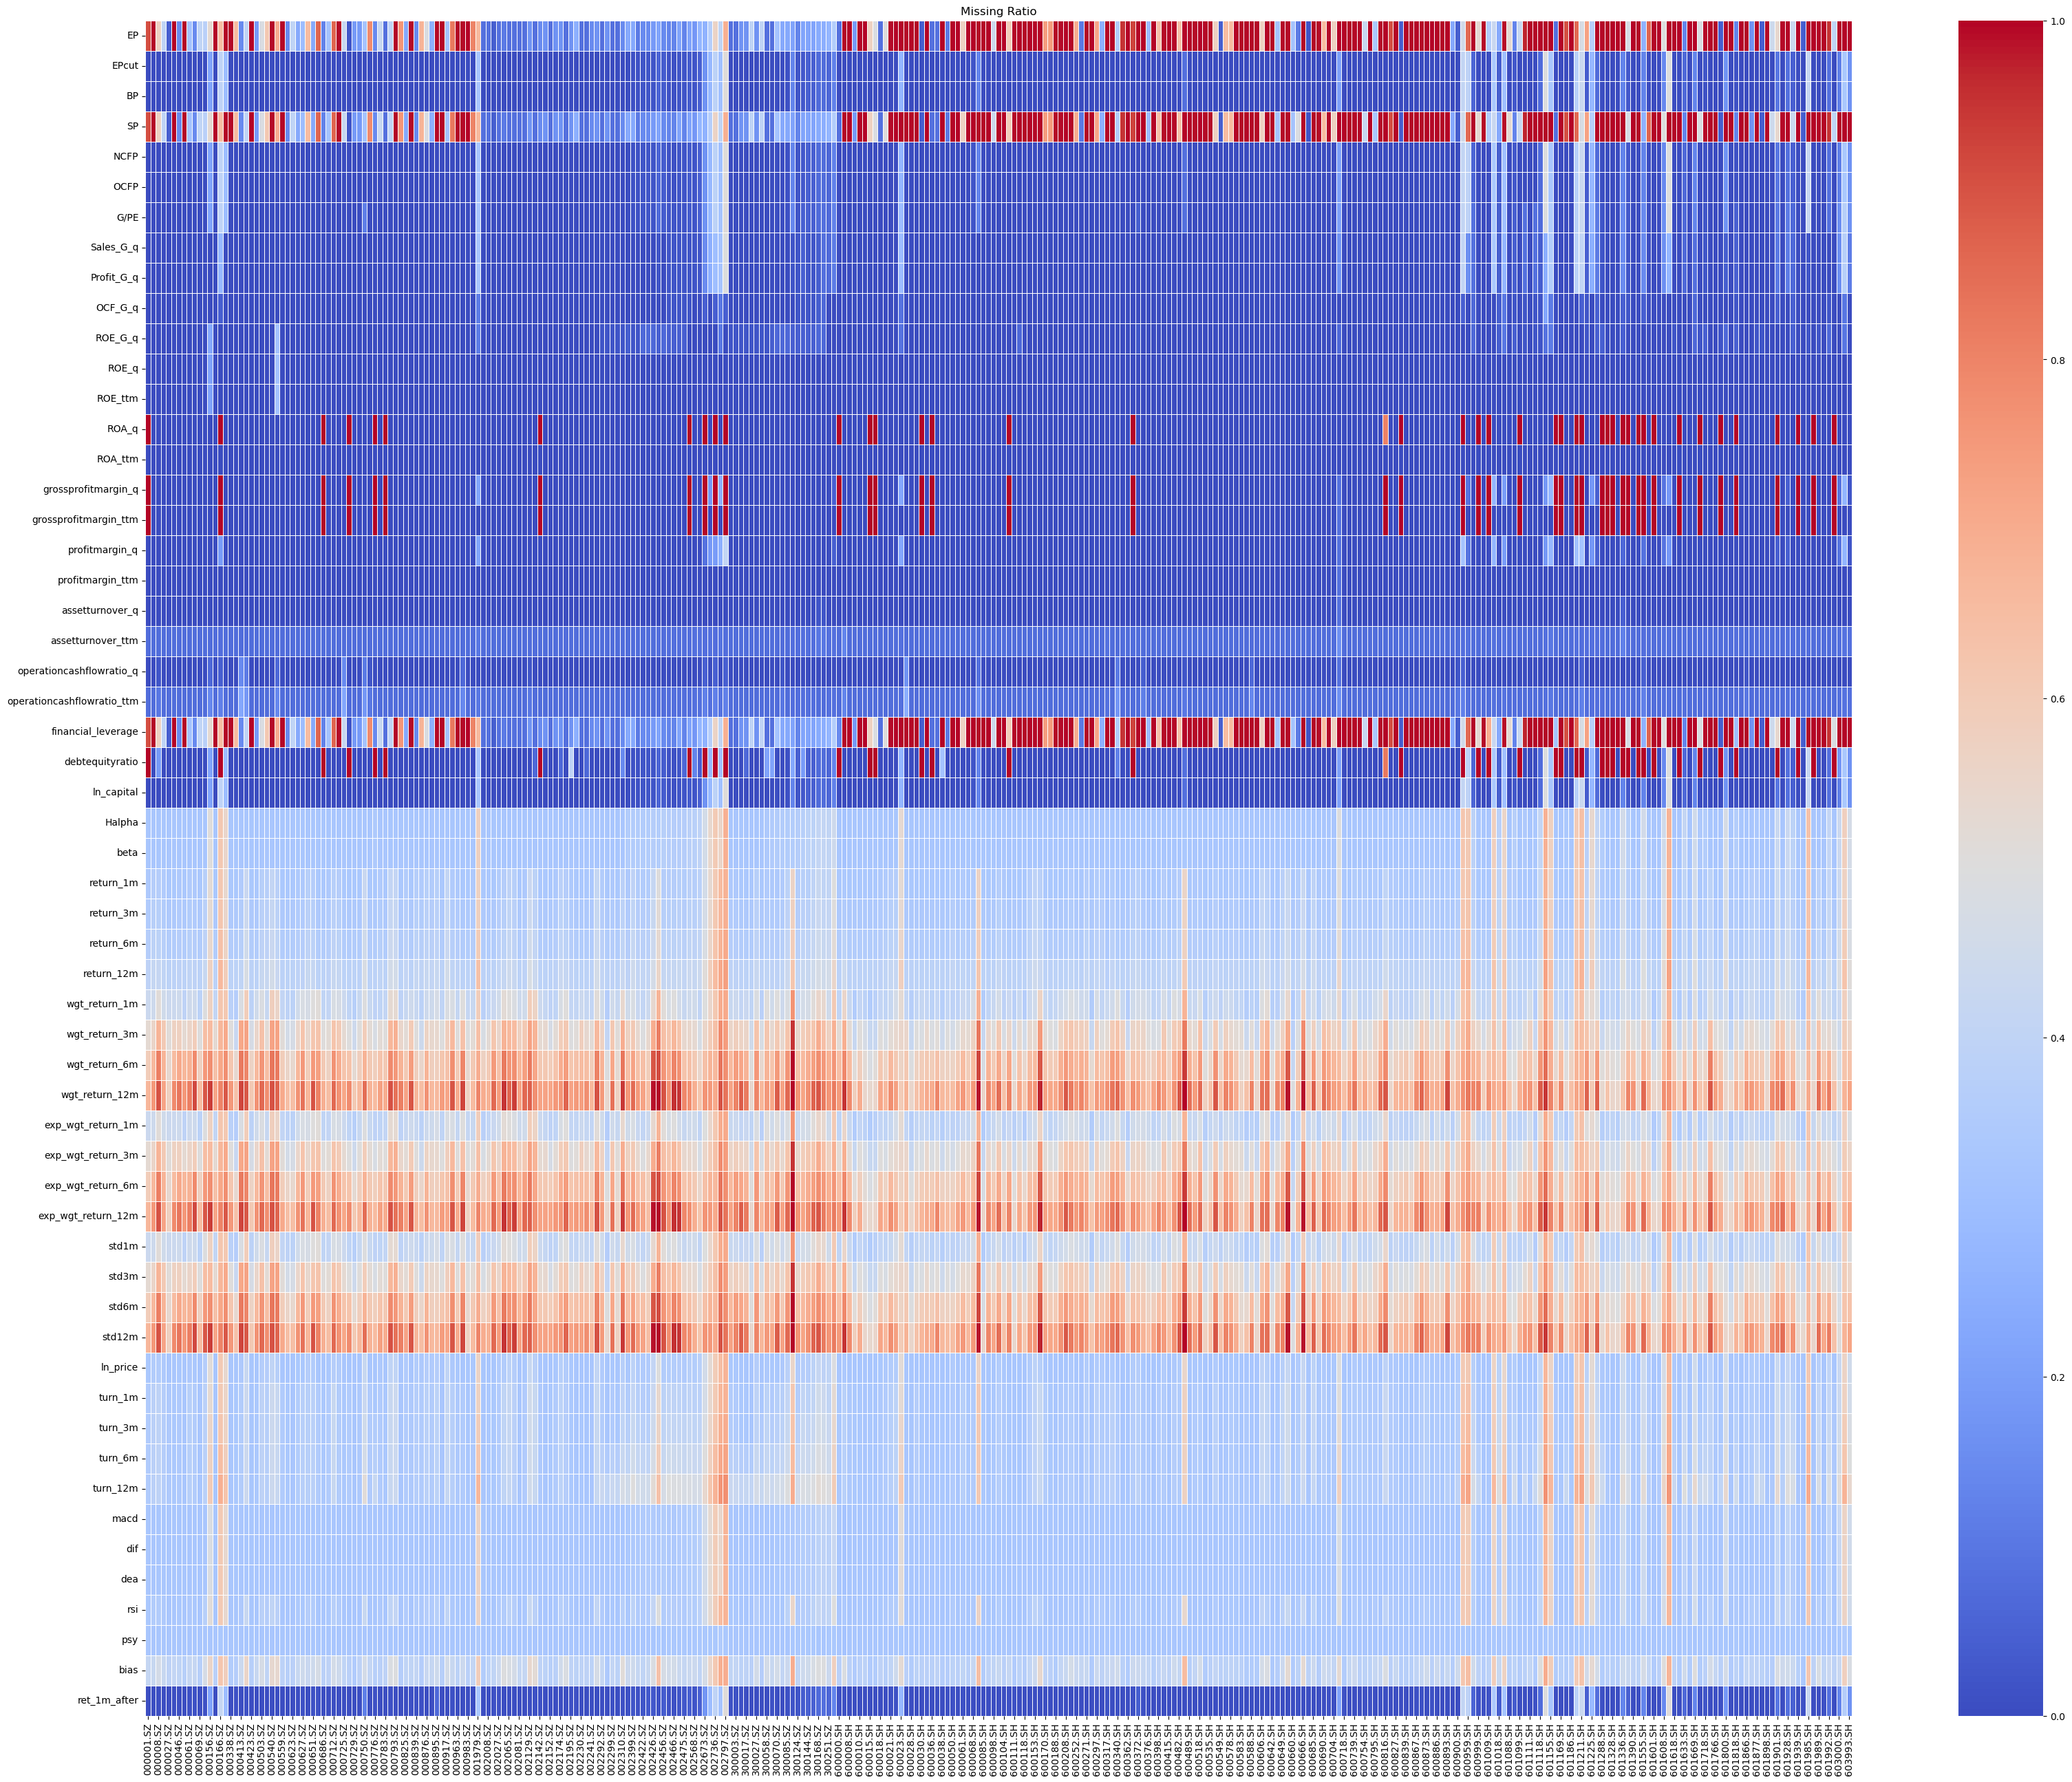

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Now, we will create a heatmap using seaborn
plt.figure(figsize=(40, 32))
heatmap = sns.heatmap(missing_info,  fmt=".1f", linewidths=.5, cmap='coolwarm')
plt.title('Missing Ratio')
plt.show()


In [58]:
drop_columns = ['SP', 'EP', 'financial_leverage']
df = df.drop(columns=drop_columns)

## 特征与处理

In [59]:
## 中位数去极值
columns = df.columns[1:]
res = pd.DataFrame()
for date, df_date in df.reset_index().groupby('date'):
    df_date_truncated = df_date.copy()
    for column in columns:
        # 计算每个因子的中位数
        median = df_date[column].median()
        # 计算差的绝对值的中位数
        abs_diff_median = abs(df_date[column] - median).median()
        # 定义上下限
        upper_limit = median + 5 * abs_diff_median
        lower_limit = median - 5 * abs_diff_median

        # 应用上下限
        df_date_truncated[column] = df_date_truncated[column].clip(lower=lower_limit, upper=upper_limit)
    res = pd.concat([res, df_date_truncated])

/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2487908739.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_truncated[column] = df_date_truncated[column].clip(lower=lower_limit, upper=upper_limit)
/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2487908739.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_truncated[column] = df_date_truncated[column].clip(lower=lower_limit, upper=upper_limit)
/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2487908739.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


In [60]:
df_clip = res.sort_values(['date', 'ts_code'])

In [61]:
df_clip

,date,ts_code,EPcut,BP,NCFP,OCFP,G/PE,Sales_G_q,Profit_G_q,OCF_G_q,...,turn_3m,turn_6m,turn_12m,macd,dif,dea,rsi,psy,bias,ret_1m_after
3402,2010-03-31,000001.SZ,218.832082,0.306884,0.020664,0.068625,2.837933,8.6063,8.6063,218.1227,...,1.121972,1.221807,1.500583,0.026612,0.065368,0.052062,49.248826,45.0,0.316399,-0.051345
1278,2010-03-31,000002.SZ,103.211520,0.373168,-0.044747,-0.065080,1.650466,-8.0760,-8.0760,-284.5560,...,1.252028,1.609063,1.808087,0.071001,-0.024705,-0.060206,51.051330,50.0,NaN,0.030819
40566,2010-03-31,000008.SZ,-0.777949,0.076281,0.013221,0.000767,0.017195,1.9067,1.9067,138.7470,...,3.090941,2.745679,2.156510,0.026916,0.073473,0.060015,63.977445,60.0,7.032473,0.097005
23990,2010-03-31,000009.SZ,60.068854,0.175290,0.064426,0.022708,0.205077,0.8834,0.8834,-28.2374,...,2.821467,2.745791,3.904706,0.048957,0.058606,0.034128,51.586828,50.0,NaN,-0.023538
37798,2010-03-31,000027.SZ,125.087646,0.464263,0.031482,0.034195,5.862080,62.4725,62.4725,35.0544,...,1.855683,2.424163,2.184733,0.041846,0.031872,0.010949,49.002027,45.0,NaN,-0.025069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44152,2021-12-31,601992.SH,554.122812,1.573908,-0.164340,0.313676,-1.136075,0.1682,0.1682,-11.1406,...,0.363003,0.286846,0.302398,0.018719,0.035888,0.026529,59.090909,45.0,1.320014,0.016730
23279,2021-12-31,601998.SH,1776.960515,1.964049,-0.164340,-0.194629,3.615050,8.3456,8.3456,-148.0636,...,0.057767,0.059369,0.076364,0.034649,0.029899,0.012575,60.000000,45.0,1.127285,-0.006936
38214,2021-12-31,603000.SH,80.479670,0.210347,-0.025458,0.026436,-1.151873,-4.0847,-4.0847,-14.4109,...,0.795151,1.026001,1.020746,0.145649,0.283610,0.210786,65.492958,55.0,4.247244,NaN
41393,2021-12-31,603885.SH,-190.774068,0.288135,-0.014485,0.044608,-12.858818,-10.0273,-10.0273,154.1168,...,0.403208,0.466747,0.680110,0.463978,0.612887,0.103385,73.037543,65.0,12.252964,NaN


In [62]:
#获取申万一级行业列表
import numpy as np
indus =np.load('./data/indus.npy', allow_pickle=True).tolist()

In [63]:
indus

{'601318.SH': '801841.SI',
 '600519.SH': '801853.SI',
 '600036.SH': '801841.SI',
 '601166.SH': '851911.SI',
 '600016.SH': '801843.SI',
 '601328.SH': '801192.SI',
 '000651.SZ': '801841.SI',
 '000333.SZ': '801853.SI',
 '601668.SH': '801001.SI',
 '000002.SZ': '801280.SI',
 '600000.SH': '801300.SI',
 '601288.SH': '801843.SI',
 '600030.SH': '801003.SI',
 '600837.SH': '801823.SI',
 '600887.SH': '801822.SI',
 '601169.SH': '801300.SI',
 '601398.SH': '801001.SI',
 '601766.SH': '801300.SI',
 '000725.SZ': '801001.SI',
 '600104.SH': '801823.SI',
 '600900.SH': '801832.SI',
 '601601.SH': '801001.SI',
 '000858.SZ': '801831.SI',
 '601211.SH': '801823.SI',
 '000001.SZ': '801842.SI',
 '601988.SH': '801843.SI',
 '600276.SH': '801841.SI',
 '600048.SH': '801833.SI',
 '002415.SZ': '801831.SI',
 '601390.SH': '857234.SI',
 '601989.SH': '801851.SI',
 '600050.SH': '801833.SI',
 '601818.SH': '801300.SI',
 '600028.SH': '801833.SI',
 '601186.SH': '857234.SI',
 '600518.SH': '801851.SI',
 '600015.SH': '851911.SI',
 

In [64]:
df_clip['indus'] = df_clip['ts_code'].apply(lambda x: indus[x])

In [65]:
df_clip

,date,ts_code,EPcut,BP,NCFP,OCFP,G/PE,Sales_G_q,Profit_G_q,OCF_G_q,...,turn_6m,turn_12m,macd,dif,dea,rsi,psy,bias,ret_1m_after,indus
3402,2010-03-31,000001.SZ,218.832082,0.306884,0.020664,0.068625,2.837933,8.6063,8.6063,218.1227,...,1.221807,1.500583,0.026612,0.065368,0.052062,49.248826,45.0,0.316399,-0.051345,801842.SI
1278,2010-03-31,000002.SZ,103.211520,0.373168,-0.044747,-0.065080,1.650466,-8.0760,-8.0760,-284.5560,...,1.609063,1.808087,0.071001,-0.024705,-0.060206,51.051330,50.0,NaN,0.030819,801280.SI
40566,2010-03-31,000008.SZ,-0.777949,0.076281,0.013221,0.000767,0.017195,1.9067,1.9067,138.7470,...,2.745679,2.156510,0.026916,0.073473,0.060015,63.977445,60.0,7.032473,0.097005,801833.SI
23990,2010-03-31,000009.SZ,60.068854,0.175290,0.064426,0.022708,0.205077,0.8834,0.8834,-28.2374,...,2.745791,3.904706,0.048957,0.058606,0.034128,51.586828,50.0,NaN,-0.023538,801842.SI
37798,2010-03-31,000027.SZ,125.087646,0.464263,0.031482,0.034195,5.862080,62.4725,62.4725,35.0544,...,2.424163,2.184733,0.041846,0.031872,0.010949,49.002027,45.0,NaN,-0.025069,801300.SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44152,2021-12-31,601992.SH,554.122812,1.573908,-0.164340,0.313676,-1.136075,0.1682,0.1682,-11.1406,...,0.286846,0.302398,0.018719,0.035888,0.026529,59.090909,45.0,1.320014,0.016730,801823.SI
23279,2021-12-31,601998.SH,1776.960515,1.964049,-0.164340,-0.194629,3.615050,8.3456,8.3456,-148.0636,...,0.059369,0.076364,0.034649,0.029899,0.012575,60.000000,45.0,1.127285,-0.006936,851911.SI
38214,2021-12-31,603000.SH,80.479670,0.210347,-0.025458,0.026436,-1.151873,-4.0847,-4.0847,-14.4109,...,1.026001,1.020746,0.145649,0.283610,0.210786,65.492958,55.0,4.247244,NaN,801842.SI
41393,2021-12-31,603885.SH,-190.774068,0.288135,-0.014485,0.044608,-12.858818,-10.0273,-10.0273,154.1168,...,0.466747,0.680110,0.463978,0.612887,0.103385,73.037543,65.0,12.252964,NaN,801851.SI


In [66]:
missing_fill = df_clip.groupby(['date', 'indus']).mean()

/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2017606209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  missing_fill = df_clip.groupby(['date', 'indus']).mean()


In [67]:
missing_fill

EPcut        BP      NCFP      OCFP      G/PE  \
date       indus                                                            
2010-03-31 801001.SI   104.632402  0.380104 -0.007006  0.010966  1.656330   
           801003.SI    67.437366  0.430763  0.018586  0.019819 -0.067863   
           801024.SI    21.366193  0.202364  0.011000 -0.007841  1.242476   
           801041.SI   132.309322  0.549765  0.011725  0.003635  3.635918   
           801171.SI    84.855790  0.282397  0.000662  0.011038  1.147045   
...                           ...       ...       ...       ...       ...   
2021-12-31 851911.SI  1776.960515  1.810917 -0.164340 -0.025194  3.196737   
           857232.SI  1052.028328  1.632191 -0.164340 -0.091154 -5.402994   
           857234.SI  1776.960515  1.777344 -0.072852  0.011452  0.740437   
           857322.SI   161.448090  0.087866  0.003694  0.009770  1.301834   
           857341.SI   161.568337  0.722072  0.057117  0.056126  4.907604   

                      Sales_G_q  Profit_G_q     OCF_G_q     ROE_G_q  \
date       indus                                                      
2010-03-31 801001.SI  48.909629   48.909629  -23.825071   51.515857   
           801003.SI  35.363600   35.363600  -25.529250    0.816650   
           801024.SI  33.283000   33.283000 -154.906000  101.729300   
           801041.SI  48.247400   48.247400  -88.441600   25.118500   
           801171.SI  18.218800   18.218800  208.598100   29.761800   
...                         ...         ...         ...         ...   
2021-12-31 851911.SI   4.847867    4.847867 -118.139017    4.835733   
           857232.SI -22.230000  -22.230000 -191.273400    4.512200   
           857234.SI   2.781100    2.781100  -88.021200    3.012750   
           857322.SI  34.651600   34.651600   20.354800   13.954500   
           857341.SI -48.101100  -48.101100  321.301250  115.334200   

                          ROE_q  ...   turn_3m   turn_6m  turn_12m      macd  \
date       indus                 ...                                           
2010-03-31 801001.SI   3.522125  ...  1.041062  1.139243  1.490686  0.187174   
           801003.SI   1.725300  ...  1.889061  2.362665  2.678188  0.151344   
           801024.SI   1.100300  ...  2.274852  2.533478  2.487650 -0.000824   
           801041.SI   3.322000  ...  1.850013  2.480017  2.116339  0.042788   
           801171.SI   2.984450  ...  0.123250  0.322687  0.409808  0.004563   
...                         ...  ...       ...       ...       ...       ...   
2021-12-31 851911.SI  10.119367  ...  0.243930  0.254257  0.288837 -0.044911   
           857232.SI   7.120100  ...  0.758210  0.474334  0.379322  0.083941   
           857234.SI   9.924950  ...  0.633926  0.467511  0.450160 -0.006088   
           857322.SI  26.948000  ...  1.178927  1.222479  1.121284 -0.419127   
           857341.SI   2.696500  ...  2.035148  1.388526  1.047753 -0.143531   

                           dif       dea        rsi        psy      bias  \
date       indus                                                           
2010-03-31 801001.SI  0.129247  0.041858  54.307928  45.625000  3.133169   
           801003.SI -0.014572 -0.090244  50.468167  50.000000  0.979152   
           801024.SI  0.037088  0.037500  44.044247  65.000000 -0.001159   
           801041.SI -0.034440 -0.055834  45.154243  45.000000  0.131166   
           801171.SI -0.003260 -0.005541  48.642766  27.500000 -0.481720   
...                        ...       ...        ...        ...       ...   
2021-12-31 851911.SI  0.037534  0.059989  52.906730  41.666667 -0.046361   
           857232.SI  0.332954  0.290983  63.437500  55.000000  4.557641   
           857234.SI  0.097546  0.100590  54.926175  47.500000  0.866952   
           857322.SI  0.677732  0.592987  55.436508  55.000000 -1.528745   
           857341.SI  0.011516  0.083282  43.055556  30.000000 -2.648658   

                      ret_1m_after  
date       indus                   

In [68]:
df_clip = df_clip.set_index(['date', 'indus'])

In [69]:
missing_fill = missing_fill.reindex(df_clip.index)
missing_fill['ts_code'] = df_clip['ts_code']

In [70]:
missing_fill

EPcut        BP      NCFP      OCFP      G/PE  \
date       indus                                                            
2010-03-31 801842.SI    63.507081  0.228480  0.001740  0.002328  1.765097   
           801280.SI   103.211520  0.373168 -0.044747 -0.065080  1.650466   
           801833.SI    53.363261  0.252968  0.001158  0.004384  1.927781   
           801842.SI    63.507081  0.228480  0.001740  0.002328  1.765097   
           801300.SI   104.676153  0.290787 -0.011136 -0.011284  2.743348   
...                           ...       ...       ...       ...       ...   
2021-12-31 801823.SI   796.039091  0.955488  0.024301  0.150241 -2.910980   
           851911.SI  1776.960515  1.810917 -0.164340 -0.025194  3.196737   
           801842.SI   294.786879  0.549843  0.042018  0.062294  0.174228   
           801851.SI  -495.482765  0.614489 -0.008911  0.052521 -3.295278   
           801822.SI   326.558260  0.452975  0.017739  0.062243 -0.072895   

                      Sales_G_q  Profit_G_q     OCF_G_q    ROE_G_q      ROE_q  \
date       indus                                                                
2010-03-31 801842.SI  33.216650   33.216650  -97.880381  51.550423   3.589058   
           801280.SI  32.499050   32.499050 -374.551700  22.903300   0.300950   
           801833.SI  54.565206   54.565206  -65.631712  47.246540   1.741053   
           801842.SI  33.216650   33.216650  -97.880381  51.550423   3.589058   
           801300.SI  67.338335   67.338335  -46.654153  75.708700   4.087112   
...                         ...         ...         ...        ...        ...   
2021-12-31 801823.SI  20.407376   20.407376   13.348065  15.663309  11.450258   
           851911.SI   4.847867    4.847867 -118.139017   4.835733  10.119367   
           801842.SI  11.618800   11.618800  -10.348475  -1.019710   4.962407   
           801851.SI  -1.418914   -1.418914   41.523215 -53.458757  -5.601611   
           801822.SI  17.162883   17.162883   33.990241  17.686534  11.726172   

                      ...   turn_6m  turn_12m      macd       dif       dea  \
date       indus      ...                                                     
2010-03-31 801842.SI  ...  2.816168  3.105077  0.078769  0.086625  0.040980   
           801280.SI  ...  1.609063  1.808087  0.071001 -0.024705 -0.060206   
           801833.SI  ...  2.051633  2.227038  0.074703  0.054863  0.017512   
           801842.SI  ...  2.816168  3.105077  0.078769  0.086625  0.040980   
           801300.SI  ...  2.854156  3.119387  0.092727 -0.027003 -0.069957   
...                   ...       ...       ...       ...       ...       ...   
2021-12-31 801823.SI  ...  0.965112  0.963690  0.049422  0.111349  0.092447   
           851911.SI  ...  0.254257  0.288837 -0.044911  0.037534  0.059989   
           801842.SI  ...  1.458014  1.453188  0.026543  0.107539  0.093251   
           801851.SI  ...  1.130424  1.117552  0.070698  0.174981  0.116446   
           801822.SI  ...  1.264689  1.315577 -0.022746  0.130845  0.126306   

                            rsi        psy      bias  ret_1m_after    ts_code  
date       indus                                                               
2010-03-31 801842.SI  51.232825  47.222222  1.870374     -0.007946  000001.SZ  
           801280.SI  51.051330  35.000000       NaN      0.019565  000002.SZ  
           801833.SI  52.352104  49.062500  1.977024      0.031369  000008.SZ  
           801842.SI  51.232825  47.222222  1.870374     -0.007946  000009.SZ  
           801300.SI  50.155565  45.882353  2.430911     -0.002340  000027.SZ  
...                         ...        ...       ...           ...        ...  
2021-12-31 801823.SI  56.558493  51.212121  1.136985      0.023938  601992.SH  
           851911.SI  52.906730  41.666667 -0.046361     -0.028936  601998.SH  
           801842.SI  55.108399  50.500000  2.159359      0.048481  603000.SH  
           801851.SI  58.012816  48.918919  3.071176      0.0211

In [71]:
df_fn = df_clip.fillna(missing_fill).fillna(0)

In [72]:
df_fn = df_fn.reset_index().set_index(['date', 'ts_code'])

In [73]:
df_fn

indus        EPcut        BP      NCFP      OCFP  \
date       ts_code                                                           
2010-03-31 000001.SZ  801842.SI   218.832082  0.306884  0.020664  0.068625   
           000002.SZ  801280.SI   103.211520  0.373168 -0.044747 -0.065080   
           000008.SZ  801833.SI    -0.777949  0.076281  0.013221  0.000767   
           000009.SZ  801842.SI    60.068854  0.175290  0.064426  0.022708   
           000027.SZ  801300.SI   125.087646  0.464263  0.031482  0.034195   
...                         ...          ...       ...       ...       ...   
2021-12-31 601992.SH  801823.SI   554.122812  1.573908 -0.164340  0.313676   
           601998.SH  851911.SI  1776.960515  1.964049 -0.164340 -0.194629   
           603000.SH  801842.SI    80.479670  0.210347 -0.025458  0.026436   
           603885.SH  801851.SI  -190.774068  0.288135 -0.014485  0.044608   
           603993.SH  801822.SI   340.450135  0.330609  0.074211  0.051362   

                           G/PE  Sales_G_q  Profit_G_q   OCF_G_q   ROE_G_q  \
date       ts_code                                                           
2010-03-31 000001.SZ   2.837933     8.6063      8.6063  218.1227    8.5973   
           000002.SZ   1.650466    -8.0760     -8.0760 -284.5560   22.9033   
           000008.SZ   0.017195     1.9067      1.9067  138.7470   52.3151   
           000009.SZ   0.205077     0.8834      0.8834  -28.2374    9.4787   
           000027.SZ   5.862080    62.4725     62.4725   35.0544   98.9162   
...                         ...        ...         ...       ...       ...   
2021-12-31 601992.SH  -1.136075     0.1682      0.1682  -11.1406    2.5853   
           601998.SH   3.615050     8.3456      8.3456 -148.0636   -1.2248   
           603000.SH  -1.151873    -4.0847     -4.0847  -14.4109  -47.7140   
           603885.SH -12.858818   -10.0273    -10.0273  154.1168  -13.3396   
           603993.SH   2.025798    44.7727     44.7727  -27.1041  114.0096   

                      ...   turn_3m   turn_6m  turn_12m      macd       dif  \
date       ts_code    ...                                                     
2010-03-31 000001.SZ  ...  1.121972  1.221807  1.500583  0.026612  0.065368   
           000002.SZ  ...  1.252028  1.609063  1.808087  0.071001 -0.024705   
           000008.SZ  ...  3.090941  2.745679  2.156510  0.026916  0.073473   
           000009.SZ  ...  2.821467  2.745791  3.904706  0.048957  0.058606   
           000027.SZ  ...  1.855683  2.424163  2.184733  0.041846  0.031872   
...                   ...       ...       ...       ...       ...       ...   
2021-12-31 601992.SH  ...  0.363003  0.286846  0.302398  0.018719  0.035888   
           601998.SH  ...  0.057767  0.059369  0.076364  0.034649  0.029899   
           603000.SH  ...  0.795151  1.026001  1.020746  0.145649  0.283610   
           603885.SH  ...  0.403208  0.466747  0.680110  0.463978  0.612887   
           603993.SH  ...  1.601706  1.771974  1.773402 -0.039553 -0.137775   

                           dea        rsi   psy       bias  ret_1m_after  
date       ts_code                                                        
2010-03-31 000001.SZ  0.052062  49.248826  45.0   0.316399     -0.051345  
           000002.SZ -0.060206  51.051330  50.0   0.000000      0.030819  
           000008.SZ  0.060015  63.977445  60.0   7.032473      0.097005  
           000009.SZ  0.034128  51.586828  50.0   1.870374     -0.023538  
           000027.SZ  0.010949  49.002027  45.0   2.430911     -0.025069  
...                        ...        ...   ...        ...           ...  
2021-12-31 601992.SH  0.026529  59.090909  45.0   1.320014      0.016730  
           601998.SH  0.012575  60.000000  45.0   1.127285     -0.006936  
           603000.SH  0.210786  65.492958  55.0   4.247244      0.048481  
           603885.SH  0.103385  73.037543  65.0  12.252964      0.021194  
           603993.SH -0.117999  31.654676  35.0  -2.336571      0.14

In [74]:
ln_capital = df_fn['ln_capital']
industry_dummies = pd.get_dummies(df_fn['indus'])
cap_and_indus = pd.concat([ln_capital, industry_dummies], axis=1)

In [75]:
industry_dummies

801001.SI  801002.SI  801003.SI  801024.SI  801041.SI  \
date       ts_code                                                            
2010-03-31 000001.SZ          0          0          0          0          0   
           000002.SZ          0          0          0          0          0   
           000008.SZ          0          0          0          0          0   
           000009.SZ          0          0          0          0          0   
           000027.SZ          0          0          0          0          0   
...                         ...        ...        ...        ...        ...   
2021-12-31 601992.SH          0          0          0          0          0   
           601998.SH          0          0          0          0          0   
           603000.SH          0          0          0          0          0   
           603885.SH          0          0          0          0          0   
           603993.SH          0          0          0          0          0   

                      801171.SI  801173.SI  801176.SI  801177.SI  801180.SI  \
date       ts_code                                                            
2010-03-31 000001.SZ          0          0          0          0          0   
           000002.SZ          0          0          0          0          0   
           000008.SZ          0          0          0          0          0   
           000009.SZ          0          0          0          0          0   
           000027.SZ          0          0          0          0          0   
...                         ...        ...        ...        ...        ...   
2021-12-31 601992.SH          0          0          0          0          0   
           601998.SH          0          0          0          0          0   
           603000.SH          0          0          0          0          0   
           603885.SH          0          0          0          0          0   
           603993.SH          0          0          0          0          0   

                      ...  851013.SI  851041.SI  851111.SI  851615.SI  \
date       ts_code    ...                                               
2010-03-31 000001.SZ  ...          0          0          0          0   
           000002.SZ  ...          0          0          0          0   
           000008.SZ  ...          0          0          0          0   
           000009.SZ  ...          0          0          0          0   
           000027.SZ  ...          0          0          0          0   
...                   ...        ...        ...        ...        ...   
2021-12-31 601992.SH  ...          0          0          0          0   
           601998.SH  ...          0          0          0          0   
           603000.SH  ...          0          0          0          0   
           603885.SH  ...          0          0          0          0   
           603993.SH  ...          0          0          0          0   

                      851781.SI  851911.SI  857232.SI  857234.SI  857322.SI  \
date       ts_code                                                            
2010-03-31 000001.SZ          0          0          0          0          0   
           000002.SZ          0          0          0          0          0   
           000008.SZ          0          0          0          0          0   
           000009.SZ          0          0          0          0          0   
           000027.SZ          0          0          0          0          0   
...                         ...        ...        ...        ...        ...   
2021-12-31 601992.SH          0          0          0          0          0   
           601998.SH          0          1          0          0          0   
           603000.SH          0          0          0          0          0   
           603885.SH          0          0          0          0          0   
           603993.SH          0          0          0          0    

In [76]:
df_fn = df_fn.drop(columns=['indus'])

In [77]:
df_fn = df_fn.reset_index().set_index('date')

In [78]:
# 中性化行业与市值
import statsmodels.api as sm
def neuralization(data, X):
    data_ = pd.DataFrame()
    for (_, data_code), (_, X_code) in zip(data.groupby('ts_code'), X.groupby('ts_code')):
        data_code_ = data_code.copy()
        for c in data.columns[1:]:
            y = data_code[c].values.reshape(-1, 1)
            X = X_code.iloc[:, 1:].values
            sm.add_constant(X)
            model = sm.OLS(y, X).fit()
            data_code_[c] = model.resid
        data_ = pd.concat([data_, data_code_])
    
    return data_

In [79]:
cap_and_indus = cap_and_indus.reset_index().set_index('date')

In [80]:
df_neu = neuralization(df_fn, cap_and_indus)

In [81]:
df_std = pd.DataFrame()
for _, df_code in df_neu.groupby(df_neu.index):
    columns = df_neu.columns[1:]
    df_code_ = df_code.copy()
    df_code_[columns] = df_code[columns].apply(lambda x: (x-x.mean())/x.std())
    df_std = pd.concat([df_std, df_code_])

In [82]:
df_std 

,ts_code,EPcut,BP,NCFP,OCFP,G/PE,Sales_G_q,Profit_G_q,OCF_G_q,ROE_G_q,...,turn_3m,turn_6m,turn_12m,macd,dif,dea,rsi,psy,bias,ret_1m_after
date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,000001.SZ,-2.089473,-1.788083,-0.964515,-0.586176,-0.716845,-1.255688,-1.255688,0.654432,-0.243562,...,-0.727406,-0.898901,-0.850694,-0.595812,0.056298,0.314880,-0.075240,0.011436,-0.776795,-0.866312
2010-03-31,000002.SZ,-1.124824,-0.022031,-1.304941,-0.849869,-0.533430,-1.331493,-1.331493,-0.944636,-0.164507,...,-0.577756,-0.485889,-0.391996,-0.174361,-0.563811,-0.531894,0.097113,0.446502,-0.896596,0.105641
2010-03-31,000008.SZ,1.091608,0.342577,0.537053,0.574141,-0.057069,-0.272999,-0.272999,1.165977,-0.052023,...,0.793629,0.376224,-0.318351,-0.475306,0.006175,0.229723,1.077702,1.269080,1.088418,0.829825
2010-03-31,000009.SZ,1.138424,0.505922,1.319574,0.448211,-0.667328,-0.878344,-0.878344,-0.131380,-0.384932,...,0.193471,-0.058642,0.852336,-0.314325,0.203849,0.332572,0.335390,0.450827,-0.119926,-0.615298
2010-03-31,000027.SZ,-0.281075,-0.337073,0.245205,-0.580520,2.105135,0.670653,0.670653,0.417865,0.674375,...,-0.411546,-0.054030,-0.291267,-0.231232,-0.386501,-0.360906,-0.257709,-0.407053,-0.148468,-0.421446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,601992.SH,0.091540,1.512703,-2.282420,2.088903,-0.024322,-0.388118,-0.388118,-0.040034,0.093643,...,-1.087690,-1.246799,-1.459071,-0.100227,-0.089932,-0.020764,0.539163,0.113765,0.130541,-0.000999
2021-12-31,601998.SH,1.375947,2.398582,-1.427977,-2.311886,0.462116,-0.026799,-0.026799,-1.044755,0.042718,...,-0.595280,-0.564907,-0.672037,-0.085728,-0.176737,-0.123561,0.451490,-0.103923,-0.087041,-0.284681
2021-12-31,603000.SH,-0.110070,-0.628256,-0.419484,-0.291935,0.005202,-0.380260,-0.380260,-0.397407,-0.566791,...,-1.192124,-0.821118,-0.928678,0.630582,0.887434,0.782300,0.985371,0.703865,0.839049,0.305333


In [83]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_std.iloc[:, 1:-1])
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# 确定主成分的数量
threshold = 0.95  # 设定阈值为95%
n_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

In [84]:
n_components

37

In [85]:
pca_37 = PCA(n_components=37)
pca.fit(df_std.iloc[:, 1:-1])


PCA()

In [86]:
X_new = pca.transform(df_std.iloc[:, 1:-1])

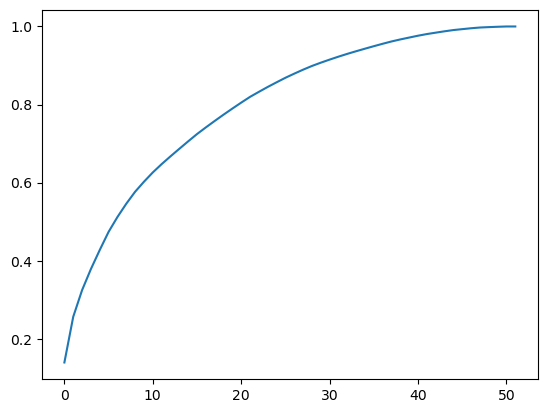

In [87]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [88]:
df_std.iloc[:, 1:-1].values

array([[-2.08947331, -1.78808255, -0.96451486, ..., -0.07524024,
         0.01143579, -0.77679495],
       [-1.12482426, -0.02203072, -1.30494107, ...,  0.0971128 ,
         0.44650157, -0.89659596],
       [ 1.09160848,  0.34257711,  0.53705252, ...,  1.07770151,
         1.26907955,  1.08841804],
       ...,
       [-0.11007046, -0.62825558, -0.41948422, ...,  0.98537131,
         0.70386498,  0.83904854],
       [-0.7538449 , -0.5523199 , -0.62123896, ...,  1.16236502,
         1.14151387,  2.46879303],
       [ 0.23522826, -0.69065684,  0.61136726, ..., -1.86005331,
        -1.66746811, -0.98801988]])

In [89]:
df_new = df_std[['ts_code']]
for idx, cl in enumerate([f'pca_{i}' for i in range(37)]):
    df_new[cl] = X_new[:, idx]

/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2912781678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[cl] = X_new[:, idx]
/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2912781678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[cl] = X_new[:, idx]
/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2912781678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [90]:
df_new['ret_1m_after'] = df_std['ret_1m_after']

/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2168834958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ret_1m_after'] = df_std['ret_1m_after']


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
insample_data = df_new['2010-01-01':'2016-12-31']
outsample_data = df_new['2017-01-01':'2022-04-28']

In [93]:
# 划分训练集和验证集
train_date, test_date = train_test_split(insample_data.index.unique(), test_size=0.1)
train_data = df_new.loc[train_date]
test_data = df_new.loc[test_date]

In [94]:
test_y.to_frame()['ret_1m_after']

date
2012-02-29    0.127952
2012-02-29   -0.148235
2012-02-29   -0.769213
2012-02-29   -0.394160
2012-02-29    0.656729
                ...   
2014-06-30    0.373204
2014-06-30    0.188186
2014-06-30    2.722768
2014-06-30   -0.120859
2014-06-30   -0.053214
Name: ret_1m_after, Length: 2967, dtype: float64

In [95]:
from sklearn.svm import SVR
from itertools import product


param_grid = {
    'C': [0.01, 0.03],
    'gamma': [1e-4,3e-4]
}

search_space = list(map(lambda x: dict(zip(param_grid.keys(), x)), list(product(*param_grid.values()))))

train_X = train_data.iloc[:, 1:-1]
train_y = train_data.iloc[:, -1]

test_X = test_data.iloc[:, 1:-1]
test_y = test_data.iloc[:, -1]

test_ic_data = test_data[['ts_code', 'ret_1m_after']]

def cross_ic(y_true, y_pred):
    true_y = test_ic_data.copy()
    true_y['ret_1m_after'] = y_true
    true_y = true_y.reset_index().pivot(index='date', columns='ts_code', values='ret_1m_after')
    pred_y = test_ic_data.copy()
    pred_y['ret_1m_after'] = y_pred
    pred_y = pred_y.reset_index().pivot(index='date', columns='ts_code', values='ret_1m_after')
    return true_y.corrwith(pred_y).mean()


best_params = None
best_estimator = None
best_ic = 0

for param in search_space:
    print(param)
    svr = SVR(kernel='rbf', **param)
    svr.fit(train_X, train_y)
    y_pred = svr.predict(test_X)
    ic = cross_ic(test_y, y_pred)
    print(f"{param}-ic: {ic}")
    if abs(ic) > best_ic:
        best_ic = ic
        best_params = param
        best_estimator = svr
        
print("最佳参数组合:", best_params)
print("最佳模型:", best_estimator)
print("最佳IC:", best_ic)

{'C': 0.01, 'gamma': 0.0001}
{'C': 0.01, 'gamma': 0.0001}-ic: 0.20305747031689325
{'C': 0.01, 'gamma': 0.0003}
{'C': 0.01, 'gamma': 0.0003}-ic: 0.20654007755210987
{'C': 0.03, 'gamma': 0.0001}
{'C': 0.03, 'gamma': 0.0001}-ic: 0.206343941712765
{'C': 0.03, 'gamma': 0.0003}
{'C': 0.03, 'gamma': 0.0003}-ic: 0.21288431924133785
最佳参数组合: {'C': 0.03, 'gamma': 0.0003}
最佳模型: SVR(C=0.03, gamma=0.0003)
最佳IC: 0.21288431924133785


In [96]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=0.03, gamma=0.003)
train_X = train_data.iloc[:, 1:-1]
train_y = train_data.iloc[:, -1]
svr_model.fit(train_X, train_y)

SVR(C=0.03, gamma=0.003)

In [97]:
# 进行预测
pred_X = outsample_data.iloc[:, 1:-1]
outsample_y = outsample_data.iloc[:, -1]
o_pred_y = svr_model.predict(pred_X)

In [98]:
outsample_pred = outsample_data[['ts_code']]
outsample_pred['svm_pred'] = o_pred_y

/var/folders/rc/d92q64ds74d0jg428sqj64lc0000gn/T/ipykernel_29650/2220669210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outsample_pred['svm_pred'] = o_pred_y


In [105]:
outsample_pred

,ts_code,svm_pred
date,,
2017-01-31,000001.SZ,-0.268972
2017-01-31,000002.SZ,-0.181697
2017-01-31,000008.SZ,0.320062
2017-01-31,000009.SZ,-0.192140
2017-01-31,000027.SZ,-0.184533
...,...,...
2021-12-31,601992.SH,-0.311698
2021-12-31,601998.SH,-0.231472
2021-12-31,603000.SH,-0.077379


In [99]:
fac_data = outsample_pred.reset_index().sort_values(['date', 'ts_code']).set_index('date')

In [100]:
import pickle
dates = pd.to_datetime(pickle.load(open('./data/date.pkl', 'rb')))

In [101]:

mask = (dates >= pd.Timestamp('2017-01-01')) & (dates <= pd.Timestamp('2021-12-31'))

In [102]:
backtest_dates = dates[mask]

In [103]:
backtest_dates

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1217, freq=None)

In [106]:
fac_data_daily = pd.DataFrame()
for code, fac_data_code in fac_data.groupby('ts_code'):
    fac_data_code_ = fac_data_code.reindex(backtest_dates).bfill()
    fac_data_daily = pd.concat([fac_data_daily, fac_data_code_])
    

In [107]:
fac_data_daily = fac_data_daily.reset_index().rename(columns={'index': 'date', 'ts_code':'code'}).dropna()

In [108]:
fac_data_daily

,date,code,svm_pred
0,2017-01-03,000001.SZ,-0.060754
1,2017-01-04,000001.SZ,-0.060754
2,2017-01-05,000001.SZ,-0.060754
3,2017-01-06,000001.SZ,-0.060754
4,2017-01-09,000001.SZ,-0.060754
...,...,...,...
401605,2021-12-27,603993.SH,-0.142117
401606,2021-12-28,603993.SH,-0.142117
401607,2021-12-29,603993.SH,-0.142117
401608,2021-12-30,603993.SH,-0.142117


In [148]:
fac_data_daily = fac_data_daily.sort_values(['date', 'code'])

In [149]:
fac_data_daily_ = fac_data_daily.drop(columns=['date'])

In [113]:
import os
path = './feature/svm_pred'
if not os.path.exists(path):
    os.makedirs(path)

for date, fac_data_date in fac_data_daily.groupby('date'):
    
    fac_data_daily_ = fac_data_date.drop(columns=['date'])
    fac_data_daily_['svm_pred'] = -1*fac_data_daily_['svm_pred']
    date = date.strftime('%Y-%m-%d')
    fac_data_daily_.to_csv(f'./feature/svm_pred/{date}.csv', index=False)


100%|██████████| 1217/1217 [00:11<00:00, 103.67it/s]


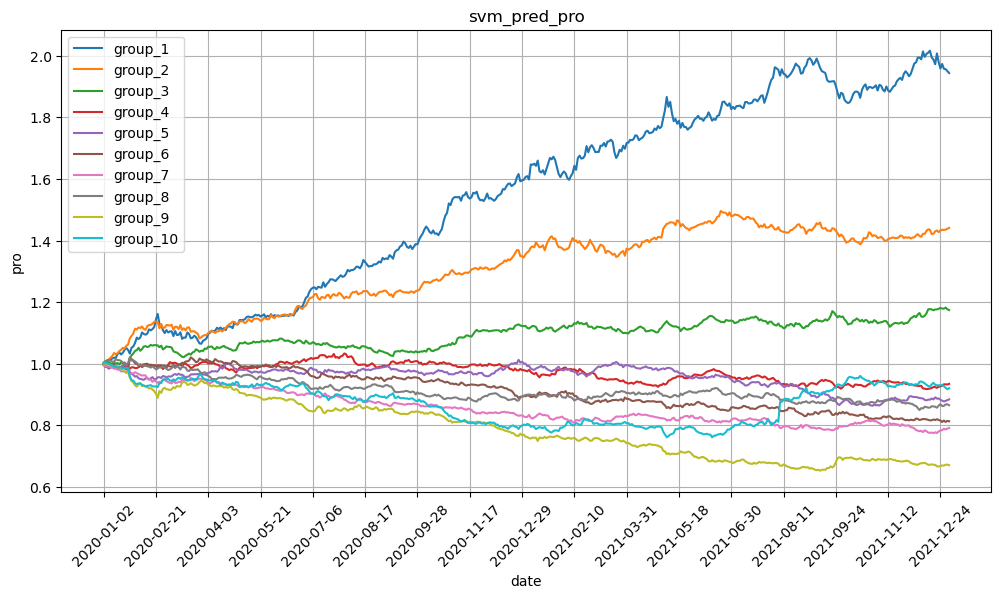

,factor_name,ic:,icir:,多头收益率:,多头波动率:,多头ir:,多头最大回撤:,对冲收益率:,对冲波动率:,对冲ir:,对冲最大回撤:
0,svm_pred,-0.028,-0.224,0.002,0.246,2.1,18.6,0.39,0.182,2.144,22.2


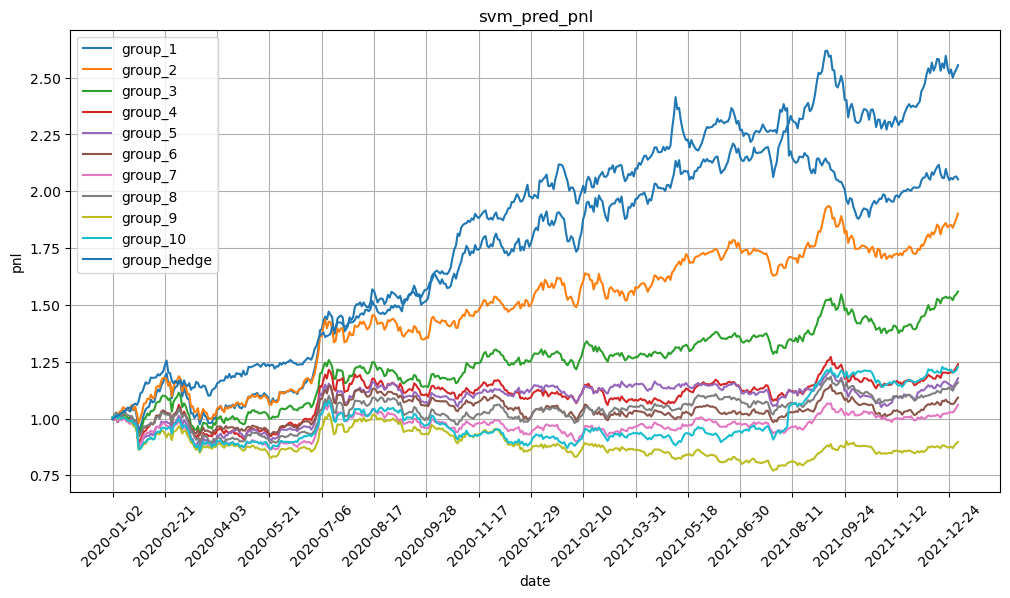

In [114]:
from backtest import BacktestAnalyzer
start_date = '2020-01-02'
end_date = '2022-04-01'
trade_date = './data/date.pkl'
factor_path = './feature/svm_pred'
ret_path = './data/data_ret'
ud_path = './data/data_ud'
group = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

analyzer = BacktestAnalyzer(start_date, end_date, trade_date, factor_path, ret_path, ud_path, group)
analyzer.prepare_data()
analyzer.calculate_effectiveness()
analyzer.result

In [1]:
0.002*252

0.504